In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

# 1 Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Drop last 3 colums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.shape

(5572, 2)

In [11]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
# Rename the column name
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [13]:
df.sample(5)

,Target,Text
3672,ham,Moji just informed me that you saved our lives...
38,ham,Anything lor... U decide...
2833,ham,U sick still can go shopping?
3394,ham,Then i buy.
3560,spam,Text BANNEDUK to 89555 to see! cost 150p texto...


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df['Target']=encoder.fit_transform(df['Target'])

In [17]:
df.sample(5)

,Target,Text
253,0,"Ups which is 3days also, and the shipping comp..."
1549,0,Dude sux for snake. He got old and raiden got ...
2372,0,Watching tv lor... Y she so funny we bluff her...
3183,0,Good morning pookie pie! Lol hope I didn't wak...
5314,1,Get the official ENGLAND poly ringtone or colo...


In [18]:
# Check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
# Check for duplicates values
df.duplicated().sum()

403

In [20]:
# Remove duplicates values
df= df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

# 2. EDA

In [23]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [24]:
import matplotlib.pyplot as plt

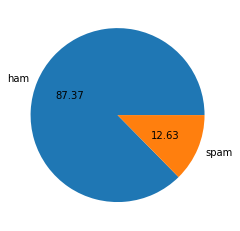

In [25]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [26]:
# Data is imbalance 

In [27]:
!pip install nltk

In [28]:
import zipfile
import os

zip_file_path = '/Users/sunny/Satyam/Downloads/punkt.zip'  # Replace with the actual path to your downloaded 'punkt.zip'
extract_path = '/Users/sunny/Satyam/Downloads/nltk_data/tokenizers/'  # Replace with the desired extraction location

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [29]:
import nltk

# Specify the path to the directory containing the 'punkt' dataset
nltk.data.path.append('/Users/sunny/Satyam/Downloads/nltk_data/tokenizers')

# Now, you should be able to use the 'punkt' tokenizer in NLTK
from nltk.tokenize import word_tokenize

# Download 'punkt' to ensure NLTK recognizes the custom data path
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunny/Satyam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
df['num_characters']=df['Text'].apply(len)

/var/folders/lb/11s5dr_x1nb97s034df0ng_80000gn/T/ipykernel_53115/911280584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Text'].apply(len)


In [31]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# fetch num. of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/lb/11s5dr_x1nb97s034df0ng_80000gn/T/ipykernel_53115/713595133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [33]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/lb/11s5dr_x1nb97s034df0ng_80000gn/T/ipykernel_53115/1211571414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [35]:
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
# ham
df[df['Target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
# spam
df[df['Target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [39]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

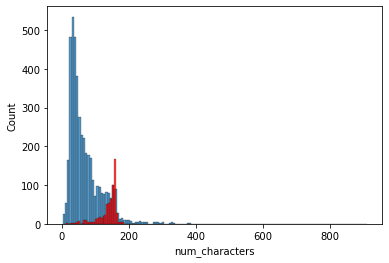

In [40]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

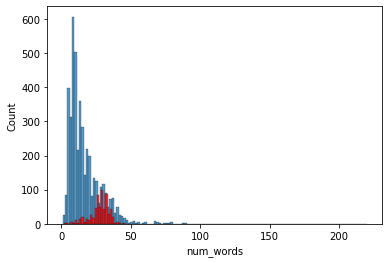

In [41]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

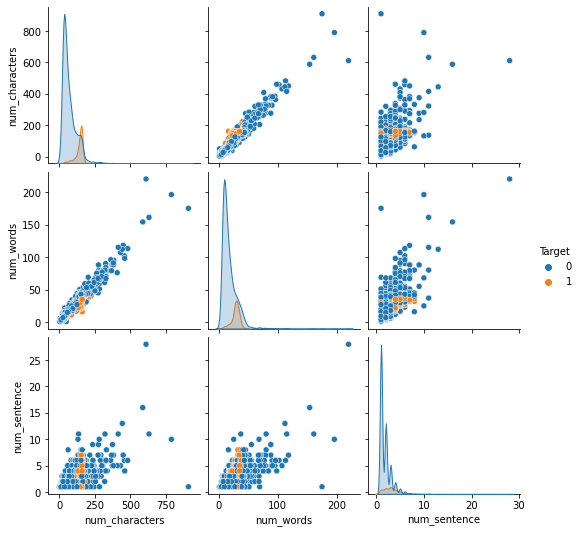

In [42]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

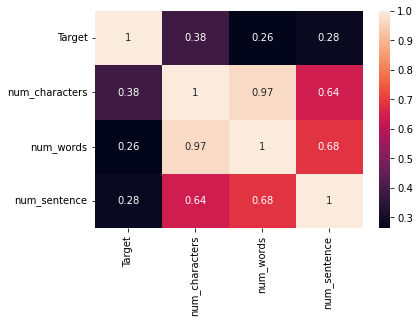

In [43]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing
 
 1-Lower case
 2-Tokenization
 3-Removing special characters
 4-Removing stop words and punctuation
 5-Stemming

In [44]:
from nltk.corpus import stopwords
import string

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sunny/Satyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return "".join(y)

In [51]:
transform_text('Hi How Are You Satyam?')

'hisatyam'

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [53]:
df['transformed_text']=df['Text'].apply(transform_text)

/var/folders/lb/11s5dr_x1nb97s034df0ng_80000gn/T/ipykernel_53115/3574485815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Text'].apply(transform_text)


In [54]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokewifuoni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsayearlihorucalreadisay
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahthinkgoeusflivearoundthough


In [55]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [56]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import pandas as pd

# Replace 'path/to/your/font.ttf' with the actual path to a TTF font file on your system
font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Example TTF font file

# Assuming df is your DataFrame
spam_text = df[df['Target'] == 1]['transformed_text'].str.cat(sep=" ")

# Apply stemming to the text
stemmer = PorterStemmer()
stemmed_text = ' '.join([stemmer.stem(word) for word in spam_text.split()])

# Create WordCloud object
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white', max_font_size=600, font_path=font_path)

# Generate the WordCloud
spam_wc = wc.generate(stemmed_text)

# Now you can display or save the word cloud as needed

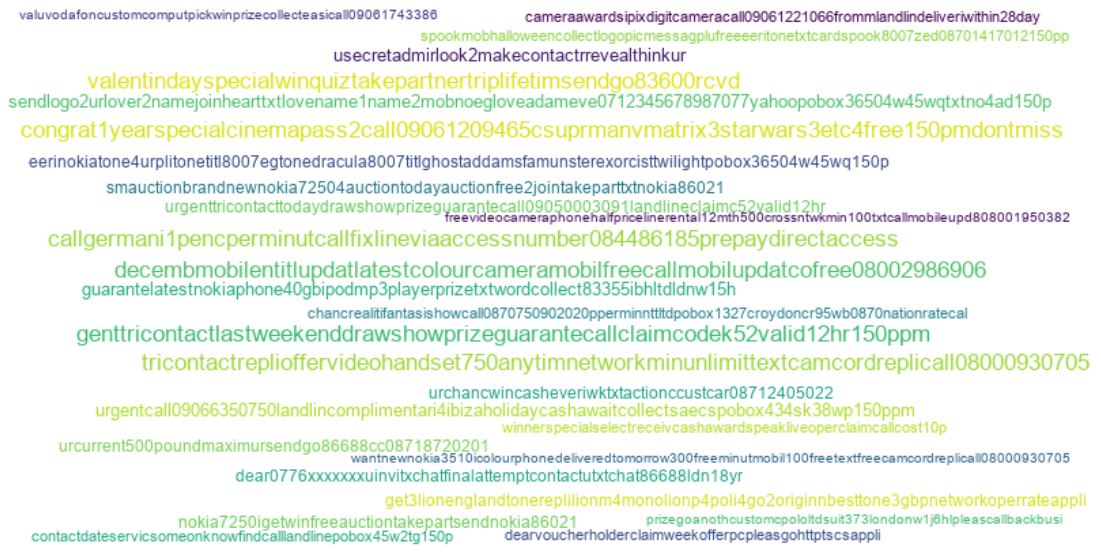

In [57]:
plt.figure(figsize=(20,10))  # Adjust the figure size if needed
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import pandas as pd

# Replace 'path/to/your/font.ttf' with the actual path to a TTF font file on your system
font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Example TTF font file

# Assuming df is your DataFrame
ham_text = df[df['Target'] == 0]['transformed_text'].str.cat(sep=" ")

# Apply stemming to the text
stemmer = PorterStemmer()
stemmed_text = ' '.join([stemmer.stem(word) for word in spam_text.split()])

# Create WordCloud object
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white', max_font_size=600, font_path=font_path)

# Generate the WordCloud
ham_wc = wc.generate(stemmed_text)

# Now you can display or save the word cloud as needed

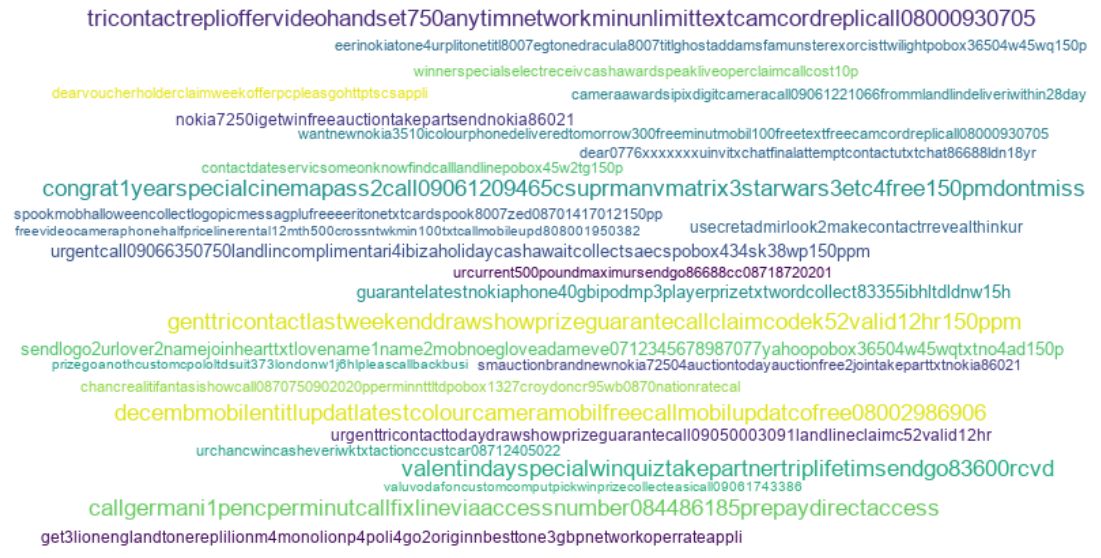

In [59]:
plt.figure(figsize=(20,10))  # Adjust the figure size if needed
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,gojurongpointcraziavailbugingreatworldlaebuffe...
1,0,Ok lar... Joking wif u oni...,29,8,2,oklarjokewifuoni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,0,U dun say so early hor... U c already then say...,49,13,1,udunsayearlihorucalreadisay
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nahthinkgoeusflivearoundthough


In [61]:
df[df['Target'] == 1]['transformed_text'].tolist()

['freeentri2wklicompwinfacupfinaltkt21stmaytextfa87121receiventriquestionstdtxtratecappli08452810075over18',
 'freemsgheydarl3weekwordbacklikefunstilltbokxxxstdchgsendrcv',
 'winnervalunetworkcustomselectreceiveaprizerewardclaimcallclaimcodekl341valid12hour',
 'mobil11monthurentitlupdatlatestcolourmobilcamerafreecallmobilupdatcofree08002986030',
 'sixchancwincash100poundtxtcsh11sendcost6daytsandcapplireplihl4info',
 'urgent1weekfreemembershipprizejackpottxtwordclaim81010clccltdpobox4403ldnw1a7rw18',
 'xxxmobilemovieclubusecreditclickwaplinknexttxtmessagclickhttp',
 'englandvmacedoniadontmissnewstxturnationteam87077egengland87077triwalescotlandpoboxox36504w45wq',
 'thanksubscriptringtonukmobilchargpleasconfirmrepliyereplicharg',
 '07732584351rodgerburnmsgtricallreplismfreenokiamobilfreecamcordpleascall08000930705deliveritomorrow',
 'smacsptvnewjerseydevildetroitredwingplayicehockeycorrectincorrectendrepliendsptv',
 'congrat1yearspecialcinemapass2call09061209465csuprmanvmatrix3starwars3e

In [62]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [63]:
len(spam_corpus)

653

/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


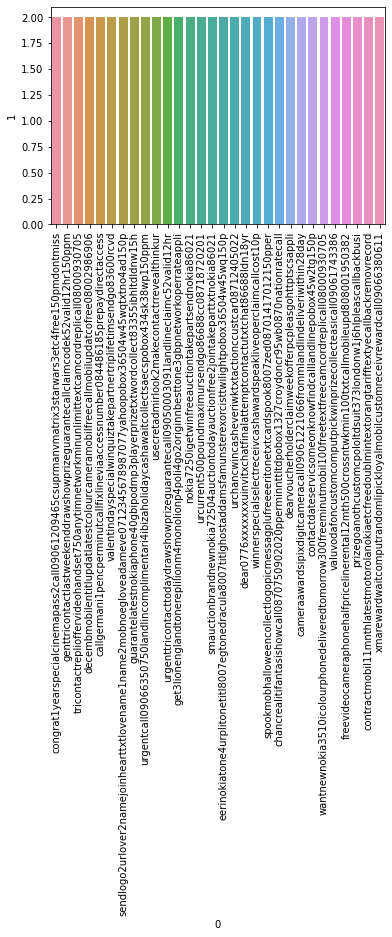

In [64]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
len(ham_corpus)

4507

/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


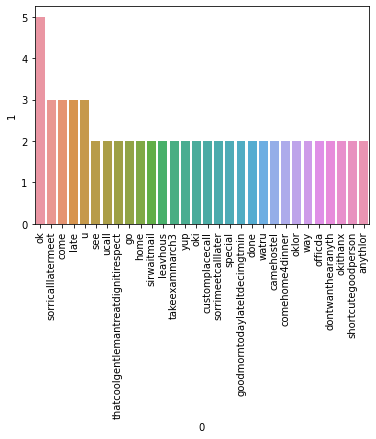

In [67]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4 Model Building

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(5169, 3000)

In [71]:
Y = df['Target'].values

In [72]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.14603481624758222
[[ 13 883]
 [  0 138]]
0.13516160626836435


In [78]:
mnb.fit(X_train,Y_train)
Y_pred2 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.14603481624758222
[[ 13 883]
 [  0 138]]
0.13516160626836435


In [79]:
bnb.fit(X_train,Y_train)
Y_pred3 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.14603481624758222
[[ 13 883]
 [  0 138]]
0.13516160626836435


In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid',gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [84]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision


In [86]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [93]:
from sklearn.metrics import accuracy_score, precision_score

In [95]:
accuracy_scores = []
precision_scores = []  # Use a different name for precision scores list

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    
    try:
        print("Precision - ", current_precision)
        precision_scores.append(current_precision)  # Use the correct variable name
    except ZeroDivisionError:
        print("Precision is undefined due to no predicted positives.")
        precision_scores.append(None)
    
    accuracy_scores.append(current_accuracy)

/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0


/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  KN
Accuracy -  0.8665377176015474
Precision -  0.0
For  NB
Accuracy -  0.8665377176015474
Precision -  0.0
For  DT
Accuracy -  0.8733075435203095
Precision -  1.0
For  LR
Accuracy -  0.8665377176015474
Precision -  0.0


/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  RF
Accuracy -  0.8733075435203095
Precision -  1.0


/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  AdaBoost
Accuracy -  0.8665377176015474
Precision -  0.0
For  BgC
Accuracy -  0.8733075435203095
Precision -  1.0
For  ETC
Accuracy -  0.8733075435203095
Precision -  1.0


/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  GBDT
Accuracy -  0.8665377176015474
Precision -  0.0
For  xgb
Accuracy -  0.8665377176015474
Precision -  0.0


/Users/sunny/Satyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,}).sort_values('Accuracy',ascending=False)

In [97]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.873308,1.0
5,RF,0.873308,1.0
7,BgC,0.873308,1.0
8,ETC,0.873308,1.0
0,SVC,0.866538,0.0
1,KN,0.866538,0.0
2,NB,0.866538,0.0
4,LR,0.866538,0.0
6,AdaBoost,0.866538,0.0
9,GBDT,0.866538,0.0


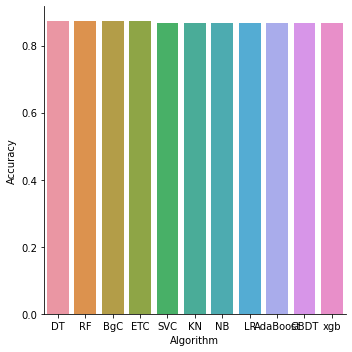

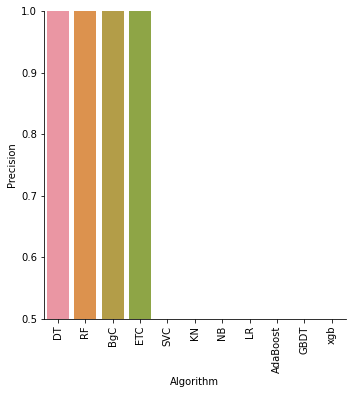

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Algorithm', 'Accuracy', and 'Precision' are columns in your DataFrame
sns.catplot(x='Algorithm', y='Accuracy', data=performance_df, kind='bar', height=5)
sns.catplot(x='Algorithm', y='Precision', data=performance_df, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))